## Menggabungkan Data Januari sampai Desember

In [1]:
import pandas as pd

# Buat list nama file CSV
bulan = ['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember']
file_names = [f"{b}-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv" for b in bulan]

# Baca file CSV dan simpan dalam list DataFrame
dfs = [pd.read_csv(file_name) for file_name in file_names]

# Gabungkan semua DataFrame menjadi satu DataFrame
df_gabungan = pd.concat(dfs)
df_gabungan.dropna(inplace=True)

# Opsional: Simpan DataFrame gabungan ke file CSV baru
df_gabungan.to_csv("combined_data.csv", index=False)


## Eksplorasi data

(943, 9)
       target_kecepatan       jarak  target_waktu_tempuh  \
count        943.000000  943.000000           943.000000   
mean          21.304348   15.028780            42.482789   
std            1.309022    3.039182             8.977026   
min           19.000000    8.450000            21.130000   
25%           20.500000   13.130000            36.640000   
50%           21.000000   14.670000            41.910000   
75%           22.000000   17.050000            47.770000   
max           24.000000   21.210000            66.980000   

       pencapaian_kecepatan_per_koridor  pencapaian_kecepatan  \
count                        943.000000            943.000000   
mean                          25.929279             25.929862   
std                            5.495554              4.315010   
min                           14.760000             16.880000   
25%                           22.245000             22.600000   
50%                           25.170000             25.35000

,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,20.5,19.62,57.43,22.70,22.98,63.83
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,20.5,13.36,39.10,25.43,22.98,37.71
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,20.5,11.13,32.58,27.54,22.98,26.99
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,20.5,16.25,47.56,22.20,22.98,50.82
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,20.5,15.87,46.45,25.99,22.98,42.06
...,...,...,...,...,...,...,...,...,...
938,Sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,23.0,20.29,52.93,21.16,22.49,58.65
939,Sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,23.0,14.47,37.75,20.72,21.67,46.75
940,Sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,23.0,15.55,40.57,18.11,21.67,54.13
941,Sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,23.0,17.43,45.47,24.61,21.67,50.71


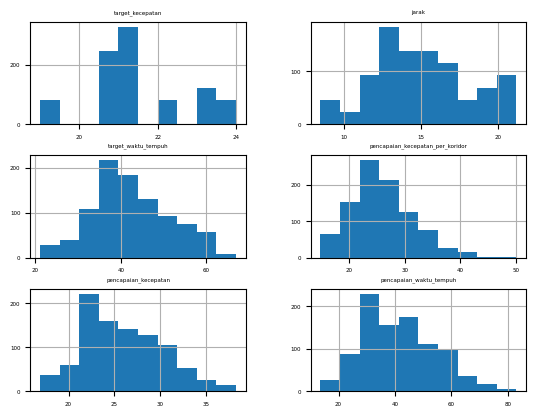

In [2]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot

# load the dataset
dataset = read_csv('combined_data.csv')

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable
print(dataset.describe())

display(dataset)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[i.title.set_size(4) for i in fig.ravel()]
# show the plot
pyplot.show()

## Hitunglah akurasi model regresi linear (gunakan cross validation) tanpa menggunakan scaling maupun encoder

In [3]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Membaca dataset
dataset = read_csv('combined_data.csv')

# Memisahkan atribut (fitur) dan label (target)
X = dataset[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = dataset['pencapaian_kecepatan']

# define and configure the model
model = LinearRegression()

# evaluate the model
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
scores = absolute(scores)

# report model performance
print('Original Data MAE: %.3f (%.3f)' % (mean(scores), std(scores)))



Original Data MAE: 2.025 (0.173)


### Buatlah histogram untuk tiga cara: (normalisasi, standarisasi, dan robust scaler) untuk fitur numerik, lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk tiga cara ini (dengan memakai fitur numerik saja)

Histogram MinMaxScaler


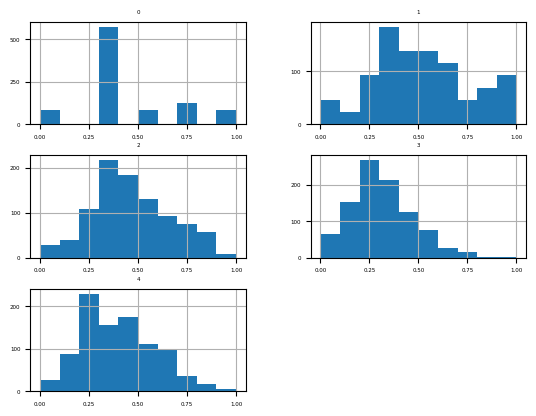

MinMaxScaler MAE: 2.025 (0.173)

Histogram StandardScaler


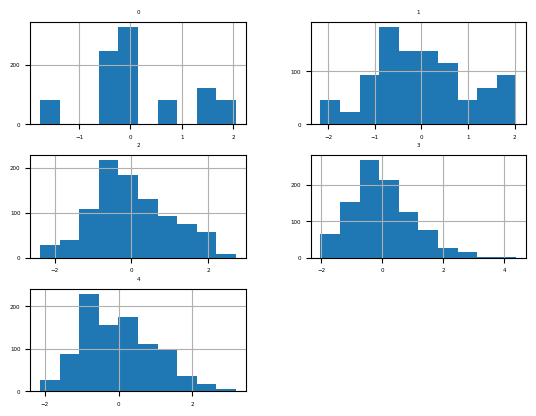

StandardScaler MAE: 2.025 (0.173)

Histogram RobustScaler


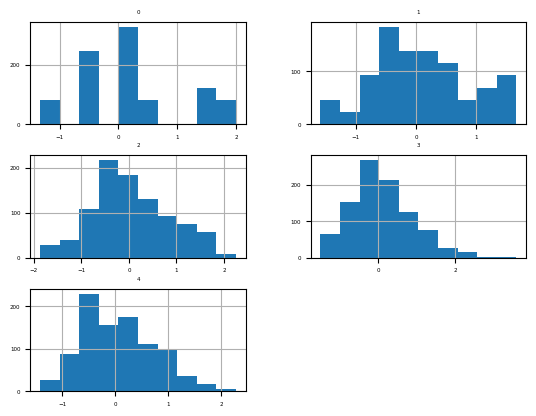

RobustScaler MAE: 2.025 (0.173)


In [4]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from matplotlib import pyplot

# Membaca dataset
dataset = read_csv('combined_data.csv')

# Memisahkan atribut (fitur) dan label (target)
# memakai fitur numerik saja
X = dataset[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = dataset['pencapaian_kecepatan']

# Normalisasi
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Standarisasi
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Robust Scaler
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)

# Inisialisasi model regresi linear
model = LinearRegression()

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Normalisasi
print('Histogram MinMaxScaler')
dataset = DataFrame(X_normalized)
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()
scores_normalized = cross_val_score(model, X_normalized, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
print('MinMaxScaler MAE: %.3f (%.3f)' % (-mean(scores_normalized), std(scores_normalized)))

# Standarisasi
print('\nHistogram StandardScaler')
dataset = DataFrame(X_standardized)
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()
scores_standardized = cross_val_score(model, X_standardized, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
print('StandardScaler MAE: %.3f (%.3f)' % (-mean(scores_standardized), std(scores_standardized)))

# Robust Scaler
print('\nHistogram RobustScaler')
dataset = DataFrame(X_robust)
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()
scores_robust = cross_val_score(model, X_robust, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
print('RobustScaler MAE: %.3f (%.3f)' % (-mean(scores_robust), std(scores_robust)))



## Gunakan onehot encoder dan ordinal encoder terhadap dataset untuk fitur kategorial. Lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk dua cara ini (dengan memakai fitur kategorial saja)

In [5]:
import pandas as pd
from pandas import read_csv
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Membaca dataset
dataset = read_csv('combined_data.csv')

# Memisahkan atribut (fitur) dan label (target)
# memakai fitur kategorial saja
X = dataset[['waktu', 'arah', 'koridor']]
y = dataset['pencapaian_kecepatan']

# Inisialisasi model regresi linear
model = LinearRegression()

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Ordinal Encoder
ordinal_encoder = OrdinalEncoder()
X_ordinal = ordinal_encoder.fit_transform(X)

# Hitung akurasi menggunakan cross-validation dengan fitur kategorial yang sudah di Ordinal Encoder
scores_ordinal = cross_val_score(model, X_ordinal, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
scores_ordinal = absolute(scores_ordinal)
print('OrdinalEncoder MAE: %.3f (%.3f)' % (mean(scores_ordinal), std(scores_ordinal)))

# OneHot Encoder
onehot_encoder = OneHotEncoder()
X_onehot = onehot_encoder.fit_transform(X)

# Hitung akurasi menggunakan cross-validation dengan fitur kategorial yang sudah di OneHot Encoder
scores_onehot = cross_val_score(model, X_onehot, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
scores_onehot = absolute(scores_onehot)
print('OneHotEncoder MAE: %.3f (%.3f)' % (mean(scores_onehot), std(scores_onehot)))

OrdinalEncoder MAE: 3.341 (0.231)
OneHotEncoder MAE: 3.065 (0.215)


## Gunakan onehot encoder dan ordinal encoder terhadap dataset untuk fitur kategorial. Lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk dua cara ini (dengan memakai fitur kategorial saja)

### OrdinalEncoder + MinMaxScaler

In [6]:
import pandas as pd
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from numpy import mean, std

# Membaca dataset
df = pd.read_csv('combined_data.csv')

# Pisahkan fitur kategorial dan numerik
X = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = df['pencapaian_kecepatan']

X_categorical = X.select_dtypes(include=['object', 'bool']).columns
X_numeric = X.select_dtypes(include=['int64', 'float64']).columns

t = [('cat', OrdinalEncoder(), X_categorical), ('num', MinMaxScaler(), X_numeric)]
col_transform = ColumnTransformer(transformers=t)

# Inisialisasi model regresi linear
model = LinearRegression()

pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

scores = absolute(scores)
# report model performance
print('OrdinalEncoder + MinMaxScaler MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

OrdinalEncoder + MinMaxScaler MAE: 2.025 (0.173)


### OneHotEncoder + MinMaxScaler

In [7]:
import pandas as pd
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from numpy import mean, std

# Membaca dataset
df = pd.read_csv('combined_data.csv')

# Pisahkan fitur kategorial dan numerik
X = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = df['pencapaian_kecepatan']

X_categorical = X.select_dtypes(include=['object', 'bool']).columns
X_numeric = X.select_dtypes(include=['int64', 'float64']).columns

t = [('cat', OneHotEncoder(), X_categorical), ('num', MinMaxScaler(), X_numeric)]
col_transform = ColumnTransformer(transformers=t)

# Inisialisasi model regresi linear
model = LinearRegression()

pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

scores = absolute(scores)
# report model performance
print('OneHotEncoder + MinMaxScaler MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

OneHotEncoder + MinMaxScaler MAE: 2.025 (0.173)


### OrdinalEncoder + StandardScaler

In [8]:
import pandas as pd
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from numpy import mean, std

# Membaca dataset
df = pd.read_csv('combined_data.csv')

# Pisahkan fitur kategorial dan numerik
X = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = df['pencapaian_kecepatan']

X_categorical = X.select_dtypes(include=['object', 'bool']).columns
X_numeric = X.select_dtypes(include=['int64', 'float64']).columns

t = [('cat', OrdinalEncoder(), X_categorical), ('num', StandardScaler(), X_numeric)]
col_transform = ColumnTransformer(transformers=t)

# Inisialisasi model regresi linear
model = LinearRegression()

pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

scores = absolute(scores)
# report model performance
print('OrdinalEncoder + StandardScaler MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

OrdinalEncoder + StandardScaler MAE: 2.025 (0.173)


### OneHotEncoder + StandardScaler

In [9]:
import pandas as pd
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from numpy import mean, std

# Membaca dataset
df = pd.read_csv('combined_data.csv')

# Pisahkan fitur kategorial dan numerik
X = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = df['pencapaian_kecepatan']

X_categorical = X.select_dtypes(include=['object', 'bool']).columns
X_numeric = X.select_dtypes(include=['int64', 'float64']).columns

t = [('cat', OneHotEncoder(), X_categorical), ('num', StandardScaler(), X_numeric)]
col_transform = ColumnTransformer(transformers=t)

# Inisialisasi model regresi linear
model = LinearRegression()

pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

scores = absolute(scores)
# report model performance
print('OneHotEncoder + StandardScaler MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

OneHotEncoder + StandardScaler MAE: 2.025 (0.173)


### OrdinalEncoder + RobustScaler

In [10]:
import pandas as pd
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from numpy import mean, std

# Membaca dataset
df = pd.read_csv('combined_data.csv')

# Pisahkan fitur kategorial dan numerik
X = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = df['pencapaian_kecepatan']

X_categorical = X.select_dtypes(include=['object', 'bool']).columns
X_numeric = X.select_dtypes(include=['int64', 'float64']).columns

t = [('cat', OrdinalEncoder(), X_categorical), ('num', RobustScaler(), X_numeric)]
col_transform = ColumnTransformer(transformers=t)

# Inisialisasi model regresi linear
model = LinearRegression()

pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
scores = absolute(scores)

# report model performance
print('OrdinalEncoder + RobustScaler MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

OrdinalEncoder + RobustScaler MAE: 2.025 (0.173)


### OrdinalEncoder + RobustScaler

In [11]:
import pandas as pd
from numpy import absolute
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from numpy import mean, std

# Membaca dataset
df = pd.read_csv('combined_data.csv')

# Pisahkan fitur kategorial dan numerik
X = df[['target_kecepatan', 'jarak', 'target_waktu_tempuh', 'pencapaian_kecepatan_per_koridor', 'pencapaian_waktu_tempuh']]
y = df['pencapaian_kecepatan']

X_categorical = X.select_dtypes(include=['object', 'bool']).columns
X_numeric = X.select_dtypes(include=['int64', 'float64']).columns

t = [('cat', OneHotEncoder(), X_categorical), ('num', RobustScaler(), X_numeric)]
col_transform = ColumnTransformer(transformers=t)

# Inisialisasi model regresi linear
model = LinearRegression()

pipeline = Pipeline(steps=[('prep', col_transform), ('m', model)])

# Inisialisasi KFold dengan 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)
scores = absolute(scores)

# report model performance
print('OneHotEncoder + RobustScaler MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

OneHotEncoder + RobustScaler MAE: 2.025 (0.173)
